<a href="https://colab.research.google.com/github/mihaimaruseac/demos/blob/main/squares_and_hexagons_puzzle/summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
csv_contents = """
model,prompt,score,cost
gpt-4o,square,0,0.128
chatgpt-4o-latest,square,0,0.338
gpt-4o-mini,square,0,0.006
gpt-4.1,square,0,0.426
gpt-4.1-mini,square,0,0.071
gpt-4.1-nano,square,0,0.017
gpt-3.5-turbo,square,0,0.01
gpt-4,square,0,0.15
gpt-4-1106-preview,square,0,0.232
gpt-4-0125-preview,square,0,0.287
gpt-4-turbo,square,0,0.434
o1,square,0,9.082
o3-mini,square,0,0.417
o3,square,0,0.736
o4-mini,square,0,0.316
gpt-5,square,0,0.954
gpt-5-mini,square,0,0.134
gpt-5-nano,square,0,0.048
deepseek-ai/DeepSeek-3.2,square,0,0.02
deepseek-ai/DeepSeek-R1-0528-Turbo,square,0,0.63
deepseek-ai/DeepSeek-V3.1-Terminus,square,0,0.03
deepseek-ai/DeepSeek-R1-0528,square,0,0.52
Qwen/Qwen3-Next-80B-A3B-Instruct,square,0,0.09
Qwen/Qwen3-235B-A22B-Thinking-2507,square,0,0.64
Qwen/Qwen3-32B,square,0,0.05
google/gemma-3-27b-it,square,0,0
google/gemma-3-12b-it,square,0,0
google/gemma-3-4b-it,square,0,0
moonshotai/Kimi-K2-Thinking,square,0,0.61
moonshotai/Kimi-K2-Instruct-0905,square,0,0.07
nvidia/Nemotron-3-Nano-30B-A3B,square,0,0.5
openai/gpt-oss-120b,square,0,0.01
openai/gpt-oss-20b,square,0,0.02
openai/gpt-oss-120b-Turbo,square,0,0.05
meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8,square,0,0.01
meta-llama/Llama-4-Scout-17B-16E-Instruct,square,0,0
meta-llama/Llama-3.3-70B-Instruct-Turbo,square,0,0
meta-llama/Llama-3.2-3B-Instruct,square,0,0
NousResearch/Hermes-3-Llama-3.1-405B,square,0,0.01
NousResearch/Hermes-3-Llama-3.1-70B,square,0,0
allenai/Olmo-3.1-32B-Instruct,square,0,0.07
microsoft/phi-4,square,0,0
microsoft/WizardLM-2-8x22B,square,0,0.02
zai-org/GLM-4.6,square,0,0.37
zai-org/GLM-4.6V,square,0,0.15
zai-org/GLM-4.7,square,0,0.48
anthropic/claude-3-haiku-20240307,square,0,0.01
anthropic/claude-3-7-sonnet-latest,square,0,0.09
anthropic/claude-opus-4-0,square,0,1.3
anthropic/claude-sonnet-4-0,square,0,0.2
anthropic/claude-opus-4-1-20250805,square,0,1.02
anthropic/claude-sonnet-4-5,square,0,0.2
anthropic/claude-haiku-4-5-20251001,square,0,0.07
sonar-deep-research,square,0,11.95
sonar-reasoning-pro,square,0,0.21
sonar-pro,square,0,0.14
sonar,square,0,0.06
mistral/ministral-3b-latest,square,0,0.01449
mistral/ministral-8b-latest,square,0,0.07175
mistral/open-mistral-nemo,square,0,0.03662
mistral/mistral-small-latest,square,0,0.02538
mistral/mistral-medium-latest,square,0,0.10541
mistral/mistral-large-latest,square,0,0.08405
mistral/pixtral-large-latest,square,0,0.05901
mistral/codestral-latest,square,0,0.04785
gemini/gemini-2.0-flash-exp,square,0,0
gemini/gemini-2.0-flash,square,0,0.004972
gemini/gemini-2.0-flash-lite,square,0,0.003957
gemini/gemini-2.5-flash,square,0,0.326109
gemini/gemini-2.5-pro,square,1,1.848074
gemini/gemini-flash-latest,square,0,0.326109
gemini/gemini-flash-lite-latest,square,0,0.038077
gemini/gemini-2.5-flash-preview-09-2025,square,2,0.326109
gemini/gemini-2.5-flash-lite-preview-09-2025,square,0,0.035734
gemini/gemini-3-pro-preview,square,0,0.130624
grok-code-fast-1,square,0,0.7949
grok-4-fast,square,0,0.0481
grok-4-fast-non-reasoning-latest,square,0,0.0053
grok-3-latest,square,0,0.4670
grok-3-mini-latest,square,0,0.036
gpt-4o,hexagon,0,0.087
chatgpt-4o-latest,hexagon,2,0.234
gpt-4o-mini,hexagon,0,0.007
gpt-4.1,hexagon,3,0.23
gpt-4.1-mini,hexagon,6,0.079
gpt-4.1-nano,hexagon,0,0.014
gpt-3.5-turbo,hexagon,0,0.004
gpt-4,hexagon,0,0.219
gpt-4-1106-preview,hexagon,0,0.197
gpt-4-0125-preview,hexagon,0,0.265
gpt-4-turbo,hexagon,0,0.195
o1,hexagon,4,10.227
o3-mini,hexagon,8,0.544
o3,hexagon,6,2.127
o4-mini,hexagon,5,0.701
gpt-5,hexagon,10,2.393
gpt-5-mini,hexagon,9,0.369
gpt-5-nano,hexagon,9,0.084
deepseek-ai/DeepSeek-3.2,hexagon,1,0.02
deepseek-ai/DeepSeek-R1-0528-Turbo,hexagon,5,0.88
deepseek-ai/DeepSeek-V3.1-Terminus,hexagon,2,0.03
deepseek-ai/DeepSeek-R1-0528,hexagon,4,0.73
Qwen/Qwen3-Next-80B-A3B-Instruct,hexagon,0,0.1
Qwen/Qwen3-235B-A22B-Thinking-2507,hexagon,1,0.78
Qwen/Qwen3-32B,hexagon,0,0.04
google/gemma-3-27b-it,hexagon,0,0
google/gemma-3-12b-it,hexagon,0,0
google/gemma-3-4b-it,hexagon,0,0
moonshotai/Kimi-K2-Thinking,hexagon,10,1.25
moonshotai/Kimi-K2-Instruct-0905,hexagon,0,0.06
nvidia/Nemotron-3-Nano-30B-A3B,hexagon,0,0.55
openai/gpt-oss-120b,hexagon,8,0.01
openai/gpt-oss-20b,hexagon,3,0.03
openai/gpt-oss-120b-Turbo,hexagon,1,0.06
meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8,hexagon,0,0.01
meta-llama/Llama-4-Scout-17B-16E-Instruct,hexagon,0,0.01
meta-llama/Llama-3.3-70B-Instruct-Turbo,hexagon,0,0.01
meta-llama/Llama-3.2-3B-Instruct,hexagon,0,0
NousResearch/Hermes-3-Llama-3.1-405B,hexagon,0,0
NousResearch/Hermes-3-Llama-3.1-70B,hexagon,0,0.01
allenai/Olmo-3.1-32B-Instruct,hexagon,0,0.08
microsoft/phi-4,hexagon,0,0
microsoft/WizardLM-2-8x22B,hexagon,0,0
zai-org/GLM-4.6,hexagon,9,1.12
zai-org/GLM-4.6V,hexagon,0,0.14
zai-org/GLM-4.7,hexagon,10,1.26
anthropic/claude-3-haiku-20240307,hexagon,0,0
anthropic/claude-3-7-sonnet-latest,hexagon,1,0.11
anthropic/claude-opus-4-0,hexagon,2,0.79
anthropic/claude-sonnet-4-0,hexagon,1,0.18
anthropic/claude-opus-4-1-20250805,hexagon,1,0.85
anthropic/claude-sonnet-4-5,hexagon,0,0.19
anthropic/claude-haiku-4-5-20251001,hexagon,3,0.06
sonar-deep-research,hexagon,0,11.75
sonar-reasoning-pro,hexagon,0,0.15
sonar-pro,hexagon,0,0.18
sonar,hexagon,1,0.05
mistral/ministral-3b-latest,hexagon,0,0.00427
mistral/ministral-8b-latest,hexagon,0,0.00617
mistral/open-mistral-nemo,hexagon,0,0.00038
mistral/mistral-small-latest,hexagon,0,0.0116
mistral/mistral-medium-latest,hexagon,0,0.06927
mistral/mistral-large-latest,hexagon,1,0.05268
mistral/pixtral-large-latest,hexagon,0,0.06148
mistral/codestral-latest,hexagon,0,0.09236
gemini/gemini-2.0-flash-exp,hexagon,0,0
gemini/gemini-2.0-flash,hexagon,0,0.004334
gemini/gemini-2.0-flash-lite,hexagon,1,0.003558
gemini/gemini-2.5-flash,hexagon,5,0.792052
gemini/gemini-2.5-pro,hexagon,2,2.172905
gemini/gemini-flash-latest,hexagon,4,0.494549
gemini/gemini-flash-lite-latest,hexagon,0,0.016146
gemini/gemini-2.5-flash-preview-09-2025,hexagon,2,0.556852
gemini/gemini-2.5-flash-lite-preview-09-2025,hexagon,0,0.020751
gemini/gemini-3-pro-preview,hexagon,10,0.142508
grok-code-fast-1,hexagon,0,0.998
grok-4-fast,hexagon,10,0.0837
grok-4-fast-non-reasoning-latest,hexagon,0,0.0005
grok-3-latest,hexagon,0,0.2041
grok-3-mini-latest,hexagon,0,0.0247
"""

In [3]:
csv_as_df = pd.read_csv(io.StringIO(csv_contents))

In [4]:
df_pivot = csv_as_df[csv_as_df['prompt'].isin(['square', 'hexagon'])].pivot_table(
    index='model',
    columns='prompt',
    values='score'
).reset_index()
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={'square': 'score_square', 'hexagon': 'score_hexagon'})
display(df_pivot)

,model,score_hexagon,score_square
0,NousResearch/Hermes-3-Llama-3.1-405B,0.0,0.0
1,NousResearch/Hermes-3-Llama-3.1-70B,0.0,0.0
2,Qwen/Qwen3-235B-A22B-Thinking-2507,1.0,0.0
3,Qwen/Qwen3-32B,0.0,0.0
4,Qwen/Qwen3-Next-80B-A3B-Instruct,0.0,0.0
...,...,...,...
75,sonar-pro,0.0,0.0
76,sonar-reasoning-pro,0.0,0.0
77,zai-org/GLM-4.6,9.0,0.0
78,zai-org/GLM-4.6V,0.0,0.0


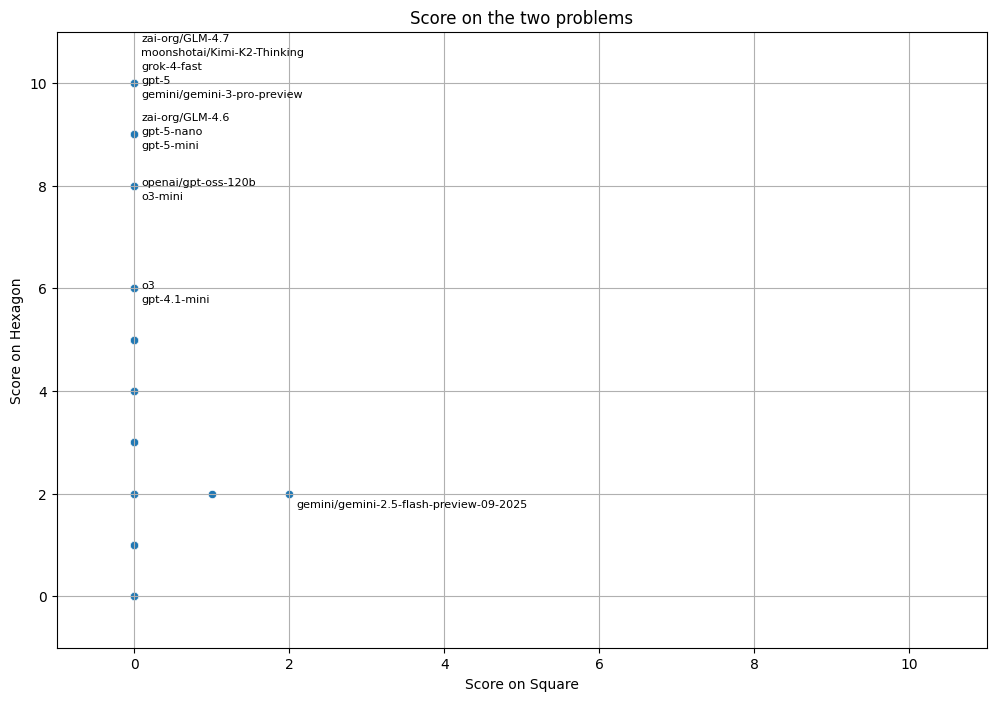

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='score_square', y='score_hexagon', data=df_pivot)
plt.title('Score on the two problems')
plt.xlabel('Score on Square')
plt.ylabel('Score on Hexagon')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.grid(True)

grouped_models = df_pivot.groupby(['score_square', 'score_hexagon'])

vertical_offset = 0
for (sq_score, hex_score), group in grouped_models:
    initial_y_offset = -10
    for i, (index, row) in enumerate(group.iterrows()):
        if row['score_square'] >= 2 or row['score_hexagon'] > 5:
            current_y_offset = initial_y_offset + (i * 10)
            plt.annotate(
                row['model'],
                (row['score_square'], row['score_hexagon']),
                textcoords="offset points",
                xytext=(5, current_y_offset),
                ha='left',
                fontsize=8
            )

plt.show()

In [6]:
df_costs = csv_as_df[csv_as_df['prompt'].isin(['square', 'hexagon'])].pivot_table(
    index='model',
    columns='prompt',
    values='cost'
).reset_index()
df_costs.columns.name = None
df_costs = df_costs.rename(columns={'square': 'cost_square', 'hexagon': 'cost_hexagon'})
df_costs['total_cost'] = df_costs['cost_square'] + df_costs['cost_hexagon']
display(df_costs)

,model,cost_hexagon,cost_square,total_cost
0,NousResearch/Hermes-3-Llama-3.1-405B,0.00,0.01,0.01
1,NousResearch/Hermes-3-Llama-3.1-70B,0.01,0.00,0.01
2,Qwen/Qwen3-235B-A22B-Thinking-2507,0.78,0.64,1.42
3,Qwen/Qwen3-32B,0.04,0.05,0.09
4,Qwen/Qwen3-Next-80B-A3B-Instruct,0.10,0.09,0.19
...,...,...,...,...
75,sonar-pro,0.18,0.14,0.32
76,sonar-reasoning-pro,0.15,0.21,0.36
77,zai-org/GLM-4.6,1.12,0.37,1.49
78,zai-org/GLM-4.6V,0.14,0.15,0.29


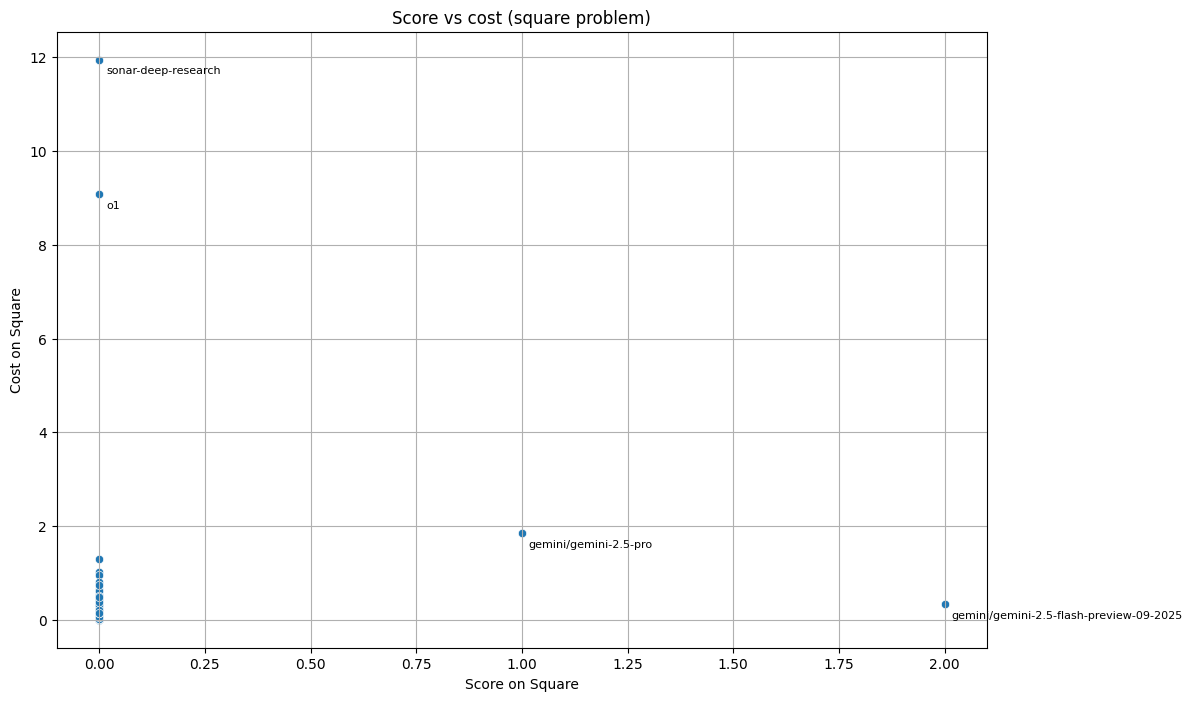

In [7]:
df_combined = pd.merge(df_pivot[['model', 'score_square']], df_costs[['model', 'cost_square']], on='model')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='score_square', y='cost_square', data=df_combined)
plt.title('Score vs cost (square problem)')
plt.xlabel('Score on Square')
plt.ylabel('Cost on Square')
plt.grid(True)

grouped_models_cost = df_combined.groupby(['score_square', 'cost_square'])

for (sq_score, cost_sq), group in grouped_models_cost:
    initial_y_offset = -10
    for i, (index, row) in enumerate(group.iterrows()):
        if row['score_square'] >= 1 or row['cost_square'] >= 6:
          current_y_offset = initial_y_offset + (i * 10)
          plt.annotate(
              row['model'],
              (row['score_square'], row['cost_square']),
              textcoords="offset points",
              xytext=(5, current_y_offset),
              ha='left',
              fontsize=8
          )

plt.show()

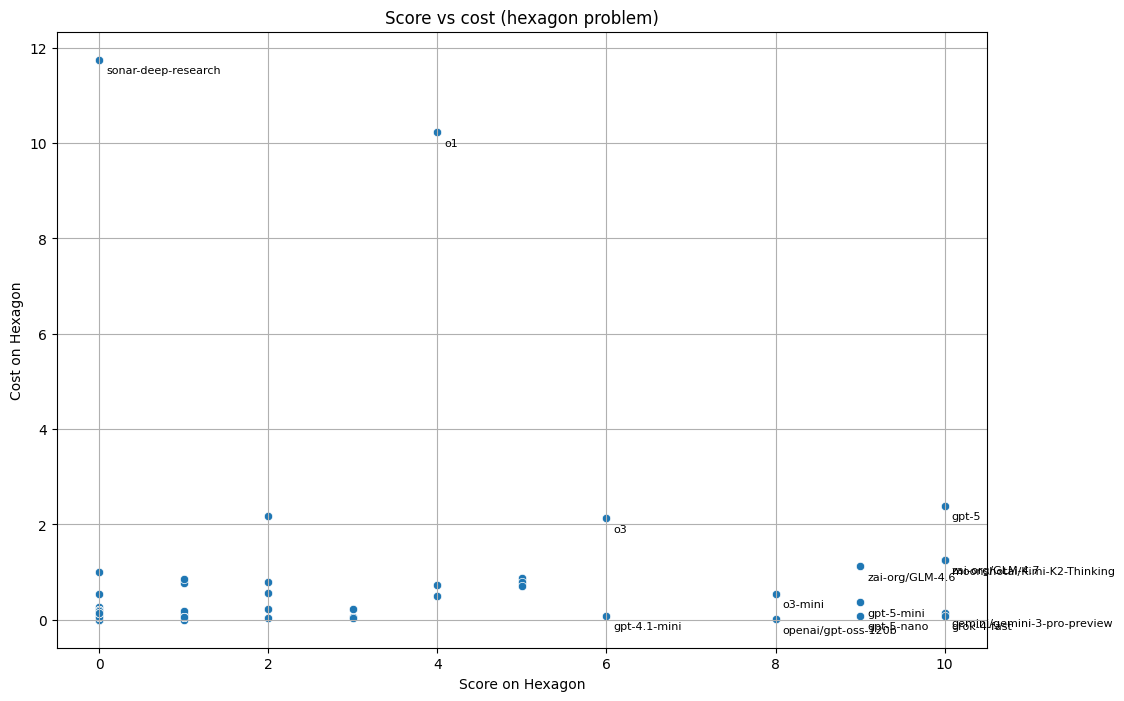

In [8]:
df_combined = pd.merge(df_pivot[['model', 'score_hexagon']], df_costs[['model', 'cost_hexagon']], on='model')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='score_hexagon', y='cost_hexagon', data=df_combined)
plt.title('Score vs cost (hexagon problem)')
plt.xlabel('Score on Hexagon')
plt.ylabel('Cost on Hexagon')
plt.grid(True)

grouped_models_cost = df_combined.groupby(['score_hexagon', 'cost_hexagon'])

for (sq_score, cost_sq), group in grouped_models_cost:
    initial_y_offset = -10
    for i, (index, row) in enumerate(group.iterrows()):
        if row['score_hexagon'] >= 6 or row['cost_hexagon'] >= 6:
          current_y_offset = initial_y_offset + (i * 10)
          plt.annotate(
              row['model'],
              (row['score_hexagon'], row['cost_hexagon']),
              textcoords="offset points",
              xytext=(5, current_y_offset),
              ha='left',
              fontsize=8
          )

plt.show()

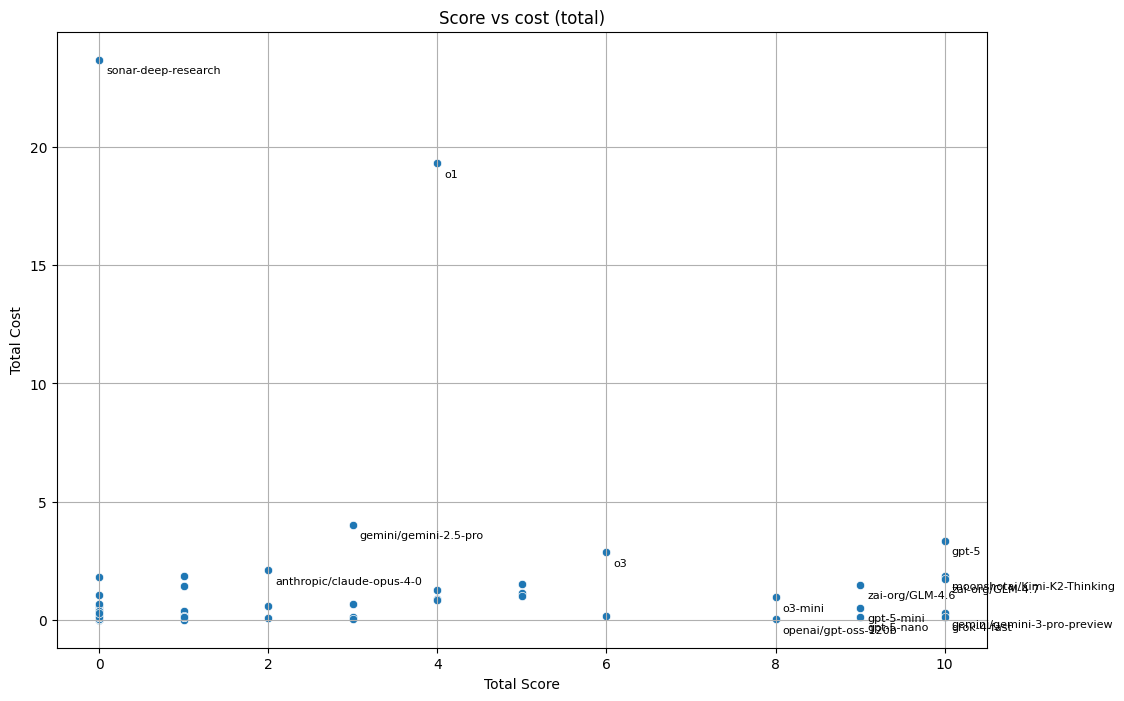

In [9]:
df_combined_total = pd.merge(df_pivot[['model', 'score_square', 'score_hexagon']], df_costs[['model', 'total_cost']], on='model')
df_combined_total['total_score'] = df_combined_total['score_square'] + df_combined_total['score_hexagon']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_score', y='total_cost', data=df_combined_total)
plt.title('Score vs cost (total)')
plt.xlabel('Total Score')
plt.ylabel('Total Cost')
plt.grid(True)

grouped_models_total = df_combined_total.groupby(['total_score', 'total_cost'])

for (total_s, total_c), group in grouped_models_total:
    initial_y_offset = -10
    for i, (index, row) in enumerate(group.iterrows()):
        if row['total_score'] >= 8 or row['total_cost'] >= 2:
            current_y_offset = initial_y_offset + (i * 10)
            plt.annotate(
                row['model'],
                (row['total_score'], row['total_cost']),
                textcoords="offset points",
                xytext=(5, current_y_offset),
                ha='left',
                fontsize=8
            )

plt.show()

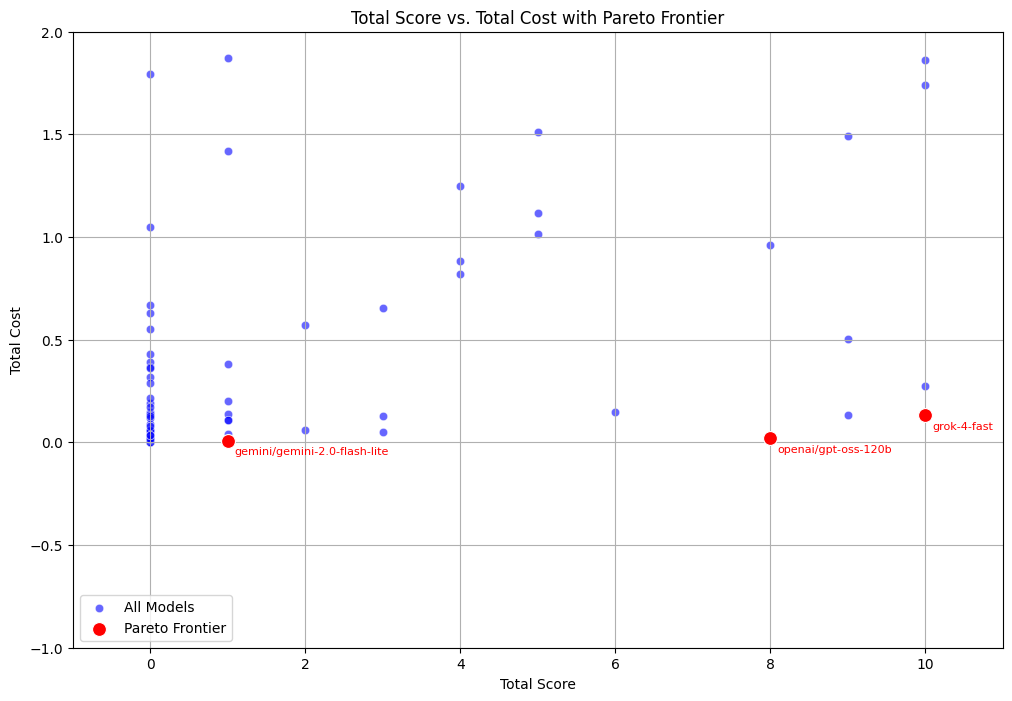

Models on the Pareto Frontier:
- grok-4-fast (Score: 10.0, Cost: 0.132)
- openai/gpt-oss-120b (Score: 8.0, Cost: 0.020)
- gemini/gemini-2.0-flash-lite (Score: 1.0, Cost: 0.008)


In [10]:
def find_pareto_frontier(df, scores, costs):
    is_pareto = np.ones(len(df), dtype=bool)
    for i, (score_i, cost_i) in enumerate(zip(df[scores], df[costs])):
        for j, (score_j, cost_j) in enumerate(zip(df[scores], df[costs])):
            if i == j:
                continue
            if score_j >= score_i and cost_j <= cost_i and (score_j > score_i or cost_j < cost_i):
                is_pareto[i] = False
                break
    return df[is_pareto]

pareto_frontier = find_pareto_frontier(df_combined_total, 'total_score', 'total_cost')
pareto_frontier = pareto_frontier[pareto_frontier['total_score'] > 0]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_score', y='total_cost', data=df_combined_total, label='All Models', color='blue', alpha=0.6)
sns.scatterplot(x='total_score', y='total_cost', data=pareto_frontier, label='Pareto Frontier', color='red', s=100, zorder=5)

plt.title('Total Score vs. Total Cost with Pareto Frontier')
plt.xlabel('Total Score')
plt.ylabel('Total Cost')
plt.xlim(-1, 11)
plt.ylim(-1, 2)
plt.grid(True)

for (total_s, total_c), group in pareto_frontier.groupby(['total_score', 'total_cost']):
    initial_y_offset = -10
    for i, (index, row) in enumerate(group.iterrows()):
        current_y_offset = initial_y_offset + (i * 10)
        plt.annotate(
            row['model'],
            (row['total_score'], row['total_cost']),
            textcoords="offset points",
            xytext=(5, current_y_offset),
            ha='left',
            fontsize=8,
            color='red'
        )
plt.legend()
plt.show()

print("Models on the Pareto Frontier:")
for index, row in pareto_frontier.sort_values(by='total_score', ascending=False).iterrows():
    print(f"- {row['model']} (Score: {row['total_score']}, Cost: {row['total_cost']:.3f})")